<pre>
Name: Ritika Sarkar 
Reg. No.: 19BAI1031 
Faculty: Dr. G. Suganya 
Slot: L3 + L4 
Course Code: CSE1015 
Date: 10.05.2021
</pre>

## KNN Clustering (Unsupervised Learning)

Link to dataset : https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv('Country-data.csv')

In [13]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data description
<pre>
- country
Name of the country
- child_mort
Death of children under 5 years of age per 1000 live births
- exports
Exports of goods and services per capita. Given as %age of the GDP per capita
- health
Total health spending per capita. Given as %age of GDP per capita
- imports
Imports of goods and services per capita. Given as %age of the GDP per capita
- Income
Net income per person
- Inflation
The measurement of the annual growth rate of the Total GDP
- life_expec
The average number of years a new born child would live if the current mortality patterns are to rem...
- total_fer
The number of children that would be born to each woman if the current age-fertility rates remain th...
- gdpp
The GDP per capita. Calculated as the Total GDP divided by the total population.
</pre>

Exploratory data analysis

In [14]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [15]:
df.shape

(167, 10)

In [16]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [17]:
df.isnull().sum() # checking missing values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

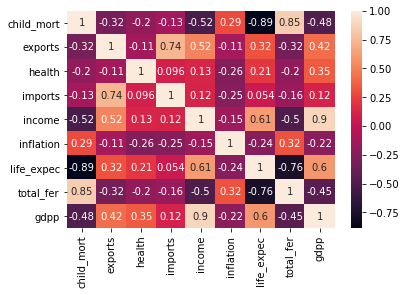

In [18]:
sns.heatmap(df.corr(),annot=True) # checking correlation

Here we observe that 
- income and gdpp 
- imports and exports
- child_mort and total_fer 
have high positive correlation respectively 
- On the other hand, life_expec and child_mort, life_expec and total_fer have high negative correlation

In [19]:
df['country'].nunique()

167

In [20]:
# the country column has all unique values so we'll drop it
df.drop('country',axis=1, inplace=True) # DON'T RUN THIS CELL TWICE

In [21]:
# we should normalise the data as gdpp and income contain quite high values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [22]:
new_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Modelling

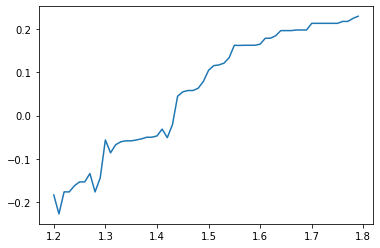

In [23]:
# Finding ideal distance and clusters using plots of 
# 
# 1. distance vs silhouette score
# 2. distance vs clusters
from sklearn_extra.cluster import CommonNNClustering
from sklearn.metrics import silhouette_score

scores = []
x = []
clus = []
dicts = []
i = 1.2
while(i<1.8):
    knn = CommonNNClustering(eps=i)
    knn.fit(new_df)
    n = knn.labels_
    scores.append(silhouette_score(new_df,knn.labels_))
    x.append(i)
    i += 0.01

    # counting cluster labels
    d = {}
    for it in n :
        if it in d :
            d[it] += 1
        else :
            d[it] = 1
    dicts.append(d)
    clus.append(len(d.keys())-1)

# distance vs silhouette score
plt.plot(x, scores)
plt.show()


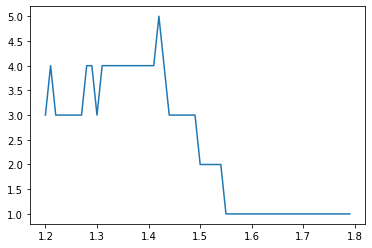

In [24]:
# distance vs clusters
plt.plot(x, clus)
plt.show()

In [25]:
knn = CommonNNClustering(eps=1.499)
knn.fit(new_df)
n = knn.labels_

d = {}
for it in n :
    if it in d :
        d[it] += 1
    else :
        d[it] = 1
print(d)

{0: 15, 1: 68, -1: 67, 2: 17}


In [26]:
knn.get_params()

{'algorithm': 'auto',
 'eps': 1.499,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

In [27]:
df['Cluster'] = n


## Visualising the clusters

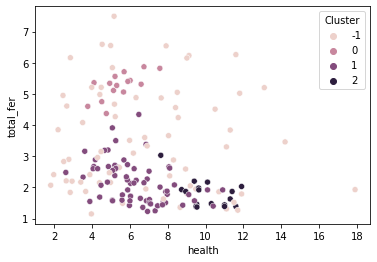

In [28]:
sns.scatterplot(x=df['health'],y=df['total_fer'],hue='Cluster', data = df)
plt.show()